In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [38]:
mnist=datasets.mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data()

x_train=(x_train.reshape(-1,784)/255).astype(np.float32)
x_test=(x_test.reshape(-1,784)/255).astype(np.float32)

x_train,x_val,t_train,t_val=train_test_split(x_train,t_train,test_size=0.2)

In [39]:
model=Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [40]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x_train,t_train,epochs=100,batch_size=128,verbose=2,validation_data=(x_val,t_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 - 1s - loss: 2.1920 - accuracy: 0.2096 - val_loss: 1.7784 - val_accuracy: 0.6437
Epoch 2/100
48000/48000 - 0s - loss: 1.6269 - accuracy: 0.4598 - val_loss: 0.9297 - val_accuracy: 0.7699
Epoch 3/100
48000/48000 - 0s - loss: 1.1547 - accuracy: 0.6111 - val_loss: 0.6340 - val_accuracy: 0.8274
Epoch 4/100
48000/48000 - 0s - loss: 0.9160 - accuracy: 0.6961 - val_loss: 0.5069 - val_accuracy: 0.8571
Epoch 5/100
48000/48000 - 0s - loss: 0.7809 - accuracy: 0.7470 - val_loss: 0.4342 - val_accuracy: 0.8758
Epoch 6/100
48000/48000 - 0s - loss: 0.6899 - accuracy: 0.7825 - val_loss: 0.3913 - val_accuracy: 0.8860
Epoch 7/100
48000/48000 - 0s - loss: 0.6254 - accuracy: 0.8041 - val_loss: 0.3581 - val_accuracy: 0.8972
Epoch 8/100
48000/48000 - 1s - loss: 0.5851 - accuracy: 0.8213 - val_loss: 0.3363 - val_accuracy: 0.9031
Epoch 9/100
48000/48000 - 1s - loss: 0.5406 - accuracy: 0.8377 - val_loss: 0.3169 - val_accuracy: 0.9081
Epoch

Epoch 78/100
48000/48000 - 1s - loss: 0.1596 - accuracy: 0.9549 - val_loss: 0.1209 - val_accuracy: 0.9644
Epoch 79/100
48000/48000 - 1s - loss: 0.1612 - accuracy: 0.9533 - val_loss: 0.1198 - val_accuracy: 0.9653
Epoch 80/100
48000/48000 - 1s - loss: 0.1598 - accuracy: 0.9542 - val_loss: 0.1201 - val_accuracy: 0.9657
Epoch 81/100
48000/48000 - 1s - loss: 0.1585 - accuracy: 0.9552 - val_loss: 0.1207 - val_accuracy: 0.9652
Epoch 82/100
48000/48000 - 1s - loss: 0.1627 - accuracy: 0.9538 - val_loss: 0.1194 - val_accuracy: 0.9654
Epoch 83/100
48000/48000 - 1s - loss: 0.1584 - accuracy: 0.9550 - val_loss: 0.1180 - val_accuracy: 0.9653
Epoch 84/100
48000/48000 - 1s - loss: 0.1523 - accuracy: 0.9571 - val_loss: 0.1190 - val_accuracy: 0.9654
Epoch 85/100
48000/48000 - 1s - loss: 0.1561 - accuracy: 0.9555 - val_loss: 0.1170 - val_accuracy: 0.9666
Epoch 86/100
48000/48000 - 1s - loss: 0.1551 - accuracy: 0.9557 - val_loss: 0.1157 - val_accuracy: 0.9662
Epoch 87/100
48000/48000 - 1s - loss: 0.1521 -

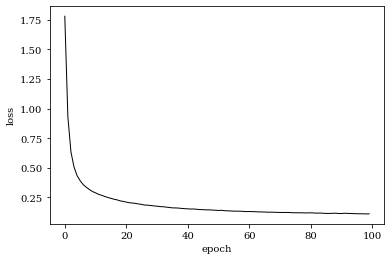

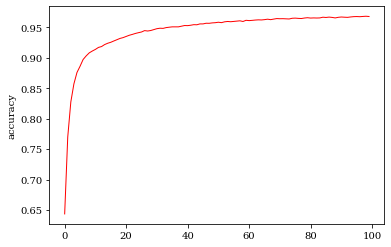

In [41]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']
plt.figure()
plt.rc('font',family='serif')
plt.plot(range(len(val_loss)),val_loss,color='black',linewidth=1)

plt.xlabel('epoch')
plt.ylabel('loss')
# plt.savefig('output.jpg')
plt.show()
plt.ylabel('accuracy')
plt.plot(range(len(val_acc)),val_acc,color='red',linewidth=1)

<Figure size 432x288 with 0 Axes>

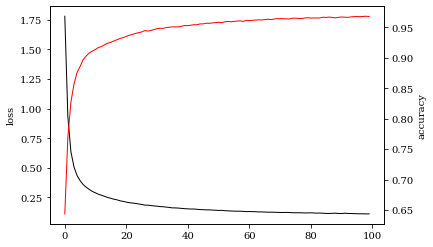

In [42]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']

fig=plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_ylabel('loss') # ラベルを設定
ax2.set_ylabel('accuracy') 
#ax2.set_ylim(0,1)

plt.rc('font',family='serif')
ax1.plot(range(len(val_loss)),val_loss,color='black',linewidth=1)
ax2.plot(range(len(val_acc)),val_acc,color='red',linewidth=1)
plt.xlabel('epoch')
# plt.savefig('output.jpg')
plt.show()

In [43]:
loss,acc=model.evaluate(x_test,t_test,verbose=0)
print('test_loss: {:.3f}, test_acc: {:.3f}'.format(loss,acc))

test_loss: 0.101, test_acc: 0.972
